In [3]:
# Notebook to generate HIV mixture assembly analysis for the Penguin paper

In [42]:
import sys,os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter

In [2]:
label_dic={"penguin":"PenguiN",
           "megahit":"Megahit",
           "metaspades":"metaSPAdes",
           "metaviralspades":"metaviralSPAdes",
           "rnaspades":"rnaSPAdes",
           "rnaviralspades": "rnaviralSPAdes",
           "iva":"IVA",
           "vicuna": "VICUNA",
           "savage": "SAVAGE",
           "haploflow":"Haploflow"
          }

color_dic={"penguin":'#EE8866',
           "megahit":'#EEDD88',
           "metaspades":'#77AADD',
           "metaviralspades":'#FFAABB',
           "rnaspades":'#99DDFF',
           "rnaviralspades":'#44BB99',
           "iva":'#D6E465',
           "vicuna": '#DDDDDD',
           "savage": '#a38995',
           "haploflow": '#AAAA00'
        }

color2Label={label_dic[label]:color_dic[label] for label in label_dic}


In [64]:
plt.rcParams["font.size"] = 6
DPI=300

In [4]:
summaryDir="../results/HIV-mixtures/summaries/"
compareDir="../results/HIV-mixtures/compare/"
mmseqsEvalDir="../results/HIV-mixtures/compare/mmseqs_eval/"
metaquastEvalDir="../results/HIV-mixtures/compare/metaquast_unique/"
outDir="../figures2/"

if not os.path.exists(outDir):
    os.mkdir(outDir)

# Figure 3

In [14]:
df_fastani = pd.read_csv(summaryDir + "fastAni_id_only.out", header=None, names=["ani"])

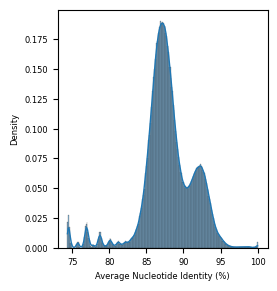

In [15]:
figureSize=(7/2.54, 7.35/2.54)
sns.histplot(data=df_fastani, kde=True, stat="density", legend=False, line_kws={"linewidth": 1}, binwidth=0.1)
plt.gcf().set_size_inches(figureSize)
plt.xlabel("Average Nucleotide Identity (%)")
plt.tight_layout()

plt.savefig(outDir+"Fig_3_A.png",dpi=DPI, transparent=True)

In [16]:
df_combined_report = pd.read_csv(metaquastEvalDir+"metaquast.combined_reference.tsv", sep="\t", index_col=False, na_values="-");
df_combined_report = df_combined_report.fillna(0);

/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3815214190.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3815214190.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_29599/3815214190.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3815214190.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_lay

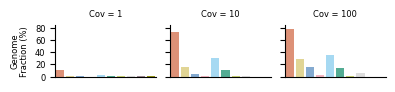

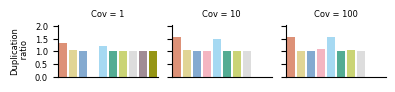

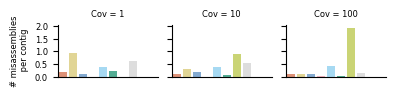

In [17]:
toolsToPlot=["penguin", "megahit", "metaspades", "metaviralspades", "rnaspades", "rnaviralspades", "iva", "vicuna", "savage", "haploflow" ]
figureSize=(10/2.54, 2.3/2.54)

g = sns.FacetGrid(df_combined_report.replace(label_dic),col="Cov")
g.map(sns.barplot, "Assembly", "Genome fraction (%)", order=[label_dic[t] for t in toolsToPlot], palette=color2Label)#fliersize=2, linewidth=1)
plt.gca().set_xticks([])

g.set_axis_labels("","Genome\nFraction (%)")
plt.gcf().set_size_inches(figureSize)
plt.gca().set_yticks([0,20,40,60,80])
plt.gca().set_ylim([0, 85])
plt.tight_layout()
plt.savefig(outDir + 'Fig_3_B_1.png', dpi=DPI, transparent=True)

g = sns.FacetGrid(df_combined_report.replace(label_dic),col="Cov")
g.map(sns.barplot, "Assembly", "Duplication ratio", order=[label_dic[t] for t in toolsToPlot], palette=color2Label)#fliersize=2, linewidth=1)
plt.gca().set_xticks([])
plt.gca().set_yticks([0,0.5,1,1.5,2])
plt.gca().set_ylim([0, 2.05])
g.set_axis_labels("","Duplication\n ratio")
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.tight_layout()
plt.savefig(outDir + 'Fig_3_B_2.png', dpi=DPI, transparent=True)

df_combined_report["misassembly rate"]=df_combined_report["# misassemblies"]/df_combined_report["# contigs (>= 1000 bp)"]
g = sns.FacetGrid(df_combined_report.replace(label_dic),col="Cov")
g.map(sns.barplot, "Assembly", "misassembly rate", order=[label_dic[t] for t in toolsToPlot], palette=color2Label)#fliersize=2, linewidth=1)
plt.gca().set_xticks([])
plt.gca().set_yticks([0,0.5,1,1.5,2])
plt.gca().set_ylim([0, 2.05])
g.set_axis_labels("","# misassemblies\n per contig")
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.tight_layout()
plt.savefig(outDir + 'Fig_3_B_3.png', dpi=DPI, transparent=True)

/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3418878129.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


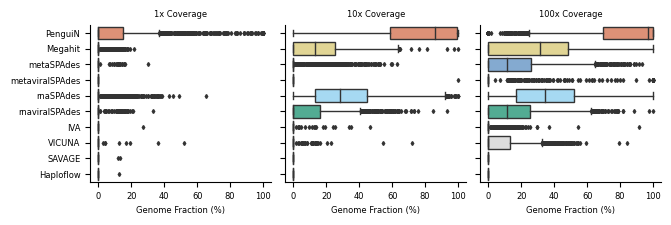

In [18]:
toolsToPlot=["penguin", "megahit", "metaspades", "metaviralspades", "rnaspades", "rnaviralspades", "iva", "vicuna", "savage", "haploflow" ]

df_gf = pd.read_csv(metaquastEvalDir+"metaquast.genomeFraction.tsv", sep="\t", index_col=False, na_values="-");
df_gf = df_gf.fillna(0);
df_gf_melt=pd.melt(df_gf, id_vars=["Assemblies","Cov"], value_vars=toolsToPlot, var_name="tool", value_name="fraction")
g = sns.FacetGrid(df_gf_melt.replace(label_dic),col="Cov")
g.map(sns.boxplot, "fraction", "tool", order=[label_dic[t] for t in toolsToPlot], palette=color2Label, fliersize=2, linewidth=1)
g.set_titles(col_template="{col_name}x Coverage")
g.set_axis_labels("Genome Fraction (%)","")
plt.gcf().set_size_inches((17/2.54,5.67/2.54))
plt.tight_layout()
plt.savefig(outDir + 'Fig_3_C.png', dpi=DPI, transparent=True)


In [19]:
for tool in ("penguin", "megahit", "rnaspades"):
    for cov in (1, 10, 100):
        print("{}\t{}\t{}".format(tool, cov, df_gf_melt.loc[(df_gf_melt["tool"]==tool) & (df_gf_melt["Cov"]==cov),"fraction"].median()))

penguin	1	0.0
penguin	10	86.0145
penguin	100	96.794
megahit	1	0.0
megahit	10	13.0885
megahit	100	31.1535
rnaspades	1	0.0
rnaspades	10	28.155
rnaspades	100	34.475


## Number of genomes recovered by more than 90%

In [20]:
df_gf_melt=pd.melt(df_gf, id_vars=["Assemblies","Cov"], value_vars=toolsToPlot, var_name="tool", value_name="fraction")
df_gf_melt[df_gf_melt["fraction"]>90].groupby(["tool","Cov"]).count()

Assemblies  fraction
tool            Cov                      
iva             100           1         1
megahit         10            3         3
                100          11        11
metaspades      100           2         2
metaviralspades 10            1         1
                100          19        19
penguin         1            27        27
                10         1136      1136
                100        1550      1550
rnaspades       10           24        24
                100          36        36
rnaviralspades  10            1         1
                100           2         2

### NGA50

/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3131768763.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


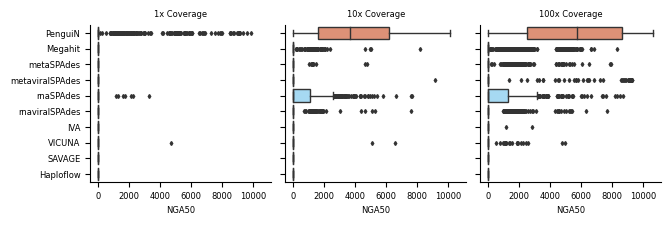

In [21]:
df_NGA50 = pd.read_csv(metaquastEvalDir+"metaquast.NGA50.tsv", sep="\t", index_col=False, na_values="-");
df_NGA50 = df_NGA50.fillna(0);
df_NGA50_melt=pd.melt(df_NGA50, id_vars=["Assemblies","Cov"], value_vars=toolsToPlot, var_name="tool", value_name="NGA50")
g = sns.FacetGrid(df_NGA50_melt.replace(label_dic),col="Cov")
g.map(sns.boxplot, "NGA50", "tool", order=[label_dic[t] for t in toolsToPlot], palette=color2Label, fliersize=2, linewidth=1)
g.set_titles(col_template="{col_name}x Coverage")
g.set_axis_labels("NGA50","")
plt.gcf().set_size_inches((17/2.54,5.67/2.54))
plt.tight_layout()
plt.savefig(outDir + 'Fig_3_D.png', dpi=DPI, transparent=True)

In [22]:
df_NGA50.loc[df_NGA50["Cov"]==10, "penguin"].median()

3634.5

In [23]:
df_NGA50.loc[df_NGA50["Cov"]==100, "penguin"].median()

5711.5

In [24]:
df_NGA50_melt=pd.melt(df_NGA50, id_vars=["Assemblies","Cov"], value_vars=toolsToPlot, var_name="tool", value_name="NGA50")
df_NGA50_melt[df_NGA50_melt["NGA50"]>3600].groupby(["tool","Cov"]).count()

Assemblies  NGA50
tool            Cov                   
megahit         10            4      4
                100         121    121
metaspades      10            2      2
                100          20     20
metaviralspades 10            1      1
                100          34     34
penguin         1            71     71
                10         1280   1280
                100        1723   1723
rnaspades       10           22     22
                100          39     39
rnaviralspades  10            5      5
                100          14     14
vicuna          1             1      1
                10            2      2
                100           2      2

In [25]:
df_NGA50_melt=pd.melt(df_NGA50, id_vars=["Assemblies","Cov"], value_vars=toolsToPlot, var_name="tool", value_name="NGA50")
df_NGA50_melt[df_NGA50_melt["NGA50"]>5700].groupby(["tool","Cov"]).count()


Assemblies  NGA50
tool            Cov                   
megahit         10            1      1
                100          13     13
metaspades      100           4      4
metaviralspades 10            1      1
                100          26     26
penguin         1            36     36
                10          749    749
                100        1283   1283
rnaspades       10            4      4
                100          12     12
rnaviralspades  10            1      1
                100           2      2
vicuna          10            1      1

# Figure 4

In [26]:
df_sensitivity_all = pd.read_csv(mmseqsEvalDir+"mmseqs.sensitivity_all.tsv", sep="\t", index_col=False, names=["type", "tool", "cov","seqid", "total", "mapped", "fraction"]);
df_sensitivity_all["fraction"]*=100

df_sensitivity_largest = pd.read_csv(mmseqsEvalDir+"mmseqs.sensitivity_largest.tsv", sep="\t", index_col=False, names=["type", "tool", "cov","seqid", "total", "mapped", "fraction"]);
df_sensitivity_largest["fraction"]*=100

df_precision = pd.read_csv(mmseqsEvalDir+"mmseqs.precision.tsv", sep="\t", index_col=False, names=["type", "tool", "cov","seqid", "total", "mapped", "fraction"]);
df_precision["fraction"]*=100

/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3850437383.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3850437383.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/annika/miniconda3/envs/py310/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_29599/3850437383.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


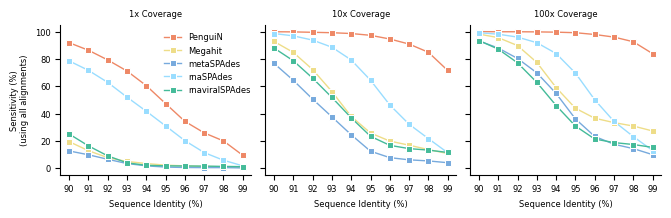

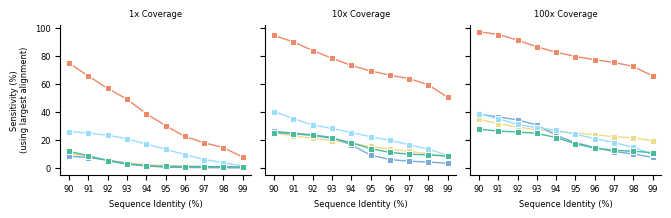

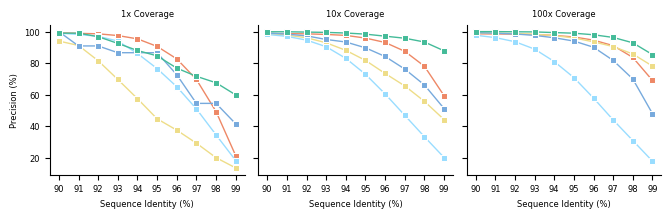

In [27]:
toolsToPlot=["penguin", "megahit", "metaspades", "rnaspades", "rnaviralspades"]

figureSize=(17/2.54, 5.5/2.54)

g = sns.FacetGrid(df_sensitivity_all[df_sensitivity_all["tool"].isin(toolsToPlot)].replace(label_dic),col="cov",hue="tool", palette=color2Label)
g.map(sns.lineplot, "seqid", "fraction",errorbar=None, marker="s", linewidth=1, markersize=4)
g.add_legend(title="", loc=(0.24,0.55))
g.set_axis_labels("Sequence Identity (%)","Sensitivity (%)\n(using all alignments)")
g.set_titles(col_template="{col_name}x Coverage")
plt.gca().set_xticks(range(90,100))
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.savefig(outDir + 'Fig_4_A.png', dpi=DPI, transparent=True)

g = sns.FacetGrid(df_sensitivity_largest[df_sensitivity_largest["tool"].isin(toolsToPlot)].replace(label_dic),col="cov",hue="tool", palette=color2Label)
g.map(sns.lineplot, "seqid", "fraction",errorbar=None, marker="s", linewidth=1, markersize=4)
#g.add_legend(title="")
g.set_axis_labels("Sequence Identity (%)","Sensitivity (%)\n(using largest alignment)")
g.set_titles(col_template="{col_name}x Coverage")
plt.gca().set_xticks(range(90,100))
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.savefig(outDir + 'Fig_4_B.png', dpi=DPI, transparent=True)

g = sns.FacetGrid(df_precision[df_precision["tool"].isin(toolsToPlot)].replace(label_dic),col="cov",hue="tool", palette=color2Label)
g.map(sns.lineplot, "seqid", "fraction",errorbar=None, marker="s", linewidth=1, markersize=4)
#g.add_legend(title="")
g.set_axis_labels("Sequence Identity (%)","Precision (%)")
g.set_titles(col_template="{col_name}x Coverage")
plt.gca().set_xticks(range(90,100))
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.savefig(outDir + 'Fig_4_C.png', dpi=DPI, transparent=True)

In [28]:
df_precision[df_precision["seqid"]==99]

,type,tool,cov,seqid,total,mapped,fraction
9,precision,penguin,1,99,3181699,673215,21.2
19,precision,megahit,1,99,92163,12380,13.4
29,precision,metaspades,1,99,23795,9857,41.4
39,precision,rnaspades,1,99,454488,82128,18.1
49,precision,rnaviralspades,1,99,63753,38148,59.8
59,precision,savage,1,99,2234,2234,100.0
69,precision,iva,1,99,2491,0,0.0
79,precision,vicuna,1,99,13479,0,0.0
89,precision,haploflow,1,99,1084,0,0.0
99,precision,penguin,10,99,26447873,15671680,59.3


In [29]:
df_sensitivity_all[df_sensitivity_all["seqid"]==99]

,type,tool,cov,seqid,total,mapped,fraction
9,sensitivity_all,penguin,1,99,22873623,2205689,9.6
19,sensitivity_all,megahit,1,99,22873623,139040,0.6
29,sensitivity_all,metaspades,1,99,22873623,85700,0.4
39,sensitivity_all,rnaspades,1,99,22873623,432031,1.9
49,sensitivity_all,rnaviralspades,1,99,22873623,292226,1.3
59,sensitivity_all,savage,1,99,22873623,47608,0.2
69,sensitivity_all,iva,1,99,22873623,0,0.0
79,sensitivity_all,vicuna,1,99,22873623,476,0.0
89,sensitivity_all,haploflow,1,99,22873623,0,0.0
99,sensitivity_all,penguin,10,99,22873623,16369705,71.6


# Figure S2

In [18]:
metaquastEvalDirReadsWithErrors="../results/HIV-mixtures/compare_with_err_rate/metaquast_unique/"


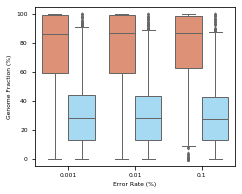

In [65]:
toolsToPlot=["penguin", "rnaspades"]
figureSize=(8.5/2.54,6.8/2.54)

df_err_gf = pd.read_csv(metaquastEvalDirReadsWithErrors+"metaquast.genomeFraction.tsv", sep="\t", index_col=False, na_values="-");
df_err_gf = df_err_gf.fillna(0);
df_err_gf["err_rate"]=df_err_gf["err_rate"]*100
df_err_gf_melt=pd.melt(df_err_gf, id_vars=["Assemblies","err_rate"], value_vars=toolsToPlot, var_name="tool", value_name="fraction")
df_err_gf_melt=df_err_gf_melt.replace(label_dic)

sns.boxplot(data=df_err_gf_melt, x="err_rate", y="fraction", hue="tool", palette=color2Label, fliersize=2, linewidth=1)

plt.legend().remove()
plt.xlabel("Error Rate (%)")
plt.ylabel("Genome Fraction (%)")
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.savefig(outDir+"Fig_S2_A.png", dpi=DPI, transparent=True)

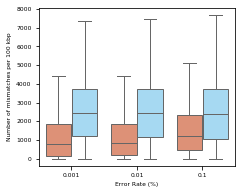

In [66]:
toolsToPlot=["penguin", "rnaspades"]
figureSize=(8.5/2.54,6.8/2.54)

df_num_mis_gf = pd.read_csv(metaquastEvalDirReadsWithErrors+"metaquast.num_mismatches_per_100_kbp.tsv", sep="\t", index_col=False, na_values="-");
df_num_mis_gf = df_num_mis_gf.fillna(0);
df_num_mis_gf["err_rate"]=df_num_mis_gf["err_rate"]*100
df_num_mis_gf_melt=pd.melt(df_num_mis_gf, id_vars=["Assemblies","err_rate"], value_vars=toolsToPlot, var_name="tool", value_name="num_mis")
df_num_mis_gf_melt=df_num_mis_gf_melt.replace(label_dic)

ax=sns.boxplot(data=df_num_mis_gf_melt, x="err_rate", y="num_mis", hue="tool", palette=color2Label, fliersize=2, linewidth=1, showfliers=False)

plt.legend().remove()
plt.xlabel("Error Rate (%)")
plt.ylabel("Number of mismatches per 100 kbp")
plt.gcf().set_size_inches(figureSize)
plt.tight_layout()
plt.savefig(outDir+"Fig_S2_B.png", dpi=DPI, transparent=True)